# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.602009e+01     1.290836e+01
 * time: 0.0016748905181884766
     1     3.541061e+01     1.390431e+01
 * time: 0.005291938781738281
     2     2.579181e+01     3.721938e+00
 * time: 0.011565923690795898
     3     2.382286e+01     5.353099e+00
 * time: 0.016920089721679688
     4     2.010053e+01     2.361750e+00
 * time: 0.022382020950317383
     5     1.971538e+01     3.349647e+00
 * time: 0.027205944061279297
     6     1.885824e+01     2.578346e+00
 * time: 0.0323488712310791
     7     1.877760e+01     2.049332e+00
 * time: 0.037010908126831055
     8     1.838694e+01     3.079108e+00
 * time: 0.041639089584350586
     9     1.778656e+01     1.556596e+00
 * time: 0.04632902145385742
    10     1.752898e+01     1.350590e+00
 * time: 0.05113697052001953
    11     1.732343e+01     8.183554e-01
 * time: 0.05606198310852051
    12     1.723444e+01     8.449344e-01
 * time: 0.05987691879272461
    13     1.718883e+01     7.057583e-01


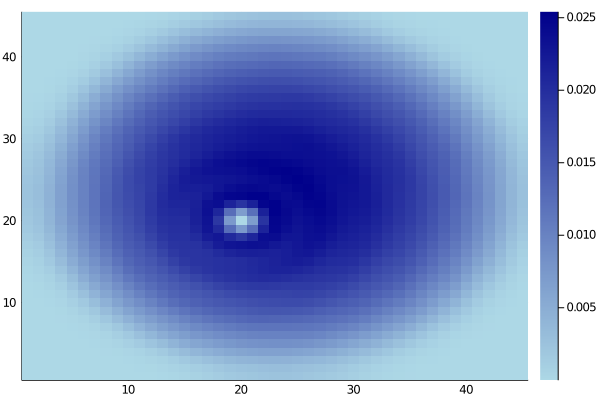

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)